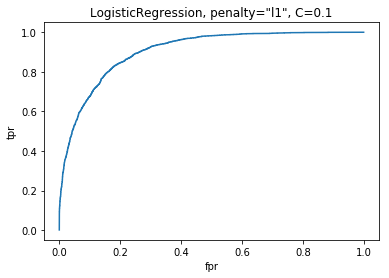

roc_auc_score 0.904919751501293
auc 0.904919751501293


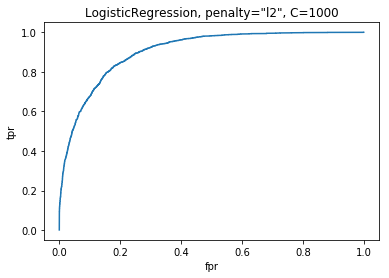

roc_auc_score 0.9046443276367759
auc 0.9046443276367759


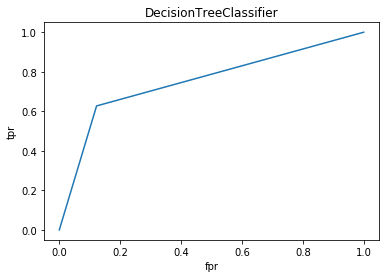

roc_auc_score 0.752369635130343
auc 0.752369635130343


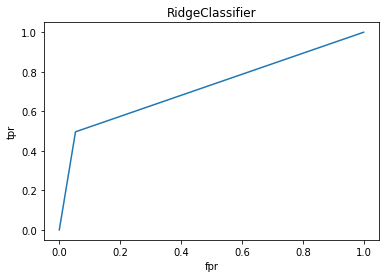

roc_auc_score 0.7215114772559864
auc 0.7215114772559864


In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

def output(y_test, predictions, title=''):
    #получаем значения false и true positive rate для различных значений порога
    fpr, tpr, thres = roc_curve(y_test, predictions)
    plt.title(title)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.plot(fpr, tpr)
    plt.show()
    print('roc_auc_score', roc_auc_score(y_test, predictions))
    print('auc', auc(fpr, tpr))
    
data = pd.read_csv('adult.csv')

target = data['income']
del data['income']

le = LabelEncoder()
target = le.fit_transform(target)

data = pd.get_dummies(data=data)
data = data.replace([np.inf, -np.inf], np.nan)
data=data.fillna(data.median(), inplace=False)
data = data.dropna(axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(penalty='l1', C=0.1)
model.fit(X_train,y_train)
predictions = model.predict_proba(X_test)
output(y_test, predictions[:, 1], title='LogisticRegression, penalty="l1", C=0.1')

model = LogisticRegression(penalty='l2', C=1000)
model.fit(X_train,y_train)
predictions = model.predict_proba(X_test)
output(y_test, predictions[:, 1], title='LogisticRegression, penalty="l2", C=1000')

model = DecisionTreeClassifier()
model.fit(X_train,y_train)
predictions = model.predict_proba(X_test)
output(y_test, predictions[:, 1], title='DecisionTreeClassifier')

model = RidgeClassifier()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
output(y_test, predictions, title='RidgeClassifier')
    
